<a href="https://colab.research.google.com/github/parul21/data_analytics/blob/master/Ex6A_mds_eign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from numpy import array
from sklearn.decomposition import PCA
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [0]:
A = np.array([[1,1],[2,1],[2,2],[3,2]])
x_var=(1,2,2,3)
y_var=(1,1,2,2)

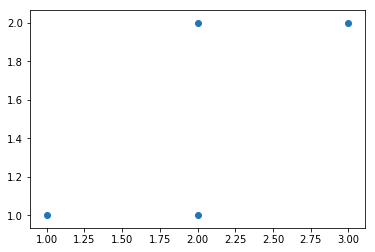

In [5]:
plt.scatter(x = x_var, y = y_var)

In [6]:
mean_x=np.mean(x_var)
mean_y=np.mean(y_var)
print(mean_x)
print(mean_y)

2.0
1.5


In [7]:
cov=np.cov(x_var,y_var)
print(cov)

[[0.66666667 0.33333333]
 [0.33333333 0.33333333]]


In [0]:
from numpy import linalg as LA

In [9]:
#eign vectors.
w, v = LA.eig(cov)
w;v

array([[ 0.85065081, -0.52573111],
       [ 0.52573111,  0.85065081]])

In [0]:
msubX = A[:,0] - mean_x

msubY = A[:,1] - mean_y

In [11]:
msubData = np.column_stack((msubX,msubY))

msubData

array([[-1. , -0.5],
       [ 0. , -0.5],
       [ 0. ,  0.5],
       [ 1. ,  0.5]])

In [14]:
Cmatprod = np.dot(msubData,msubData.T)

Cmatprod

array([[ 1.25,  0.25, -0.25, -1.25],
       [ 0.25,  0.25, -0.25, -0.25],
       [-0.25, -0.25,  0.25,  0.25],
       [-1.25, -0.25,  0.25,  1.25]])

In [15]:
eigenval, eigenvec = np.linalg.eig(Cmatprod)

print(eigenval)

print(eigenvec)

[ 2.61803399e+00  3.81966011e-01 -9.45799730e-17 -2.55373581e-17]
[[-0.68819096  0.16245985  0.67618941  0.02708022]
 [-0.16245985 -0.68819096  0.20680399  0.70658804]
 [ 0.16245985  0.68819096  0.20680399  0.70658804]
 [ 0.68819096 -0.16245985  0.67618941  0.02708022]]


In [16]:
evec=eigenvec[:,[0]]
print(evec)

[[-0.68819096]
 [-0.16245985]
 [ 0.16245985]
 [ 0.68819096]]


In [17]:
e_val=eigenval[0]
print(e_val)

2.6180339887498945


In [19]:
import math
mdsproj=math.sqrt(e_val)*evec
print(mdsproj)
from sklearn.metrics.pairwise import euclidean_distances
euc_dis_original=euclidean_distances(msubData, msubData)
print("euclidean distance")
print(euc_dis_original)

[[-1.11351636]
 [-0.26286556]
 [ 0.26286556]
 [ 1.11351636]]
euclidean distance
[[0.         1.         1.41421356 2.23606798]
 [1.         0.         1.         1.41421356]
 [1.41421356 1.         0.         1.        ]
 [2.23606798 1.41421356 1.         0.        ]]


In [20]:
euc_dis_mod=euclidean_distances(mdsproj, mdsproj)
print(euc_dis_mod)

[[0.         0.85065081 1.37638192 2.22703273]
 [0.85065081 0.         0.52573111 1.37638192]
 [1.37638192 0.52573111 0.         0.85065081]
 [2.22703273 1.37638192 0.85065081 0.        ]]


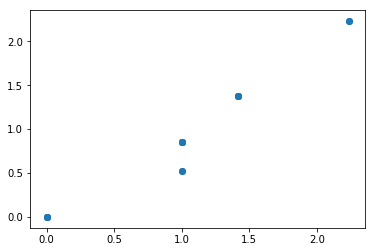

In [21]:
plt.scatter(euc_dis_original, euc_dis_mod)
plt.show()


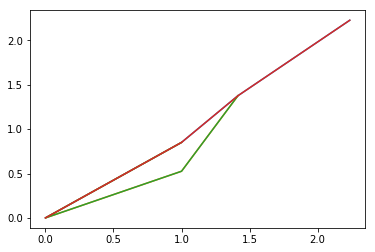

In [22]:
plt.plot(euc_dis_original, euc_dis_mod)
plt.show()

In [24]:
print(euc_dis_original-euc_dis_mod)

[[0.         0.14934919 0.03783164 0.00903525]
 [0.14934919 0.         0.47426889 0.03783164]
 [0.03783164 0.47426889 0.         0.14934919]
 [0.00903525 0.03783164 0.14934919 0.        ]]
